In [22]:
import pandas as pd
# text preprocessing modules
from string import punctuation 
import numpy as np
# text preprocessing modules
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re  # regular expression
import pathlib
import json
from os.path import dirname, join, realpath
from fastapi import FastAPI, Request
from tensorflow.keras.models import model_from_json
from fastapi.templating import Jinja2Templates
from tensorflow.keras.models import load_model
# Add necessary imports
from fastapi.responses import HTMLResponse
from fastapi import Form
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
# Download nltk resources
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
def load_and_split_data(data_path_test):
    test = pd.read_csv(data_path_test)
    X_test = test['text'].astype(str)
    y_test = test['label']
    return X_test, y_test

In [3]:
X_test, y_test = load_and_split_data('/workspaces/Emotions_analysis_NLP/data/processed/test.csv')

In [4]:
# Load the pre-trained sentiment analysis model
model_path = "/workspaces/Emotions_analysis_NLP/models/model.h5"
loaded_model = load_model(model_path)

In [5]:
# load tokenizer
def load_tokenizer(home_path):
    with open(home_path, 'r') as f:
        tokenizer_json = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_json)
    return tokenizer

In [6]:
tokenizer = load_tokenizer('/workspaces/Emotions_analysis_NLP/data/interim/tokenizer.json')

In [7]:
def padding_data( tokenizer, X_test):
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    # Max Len in X_train_sequences
    maxlen = 79
    # Perform padding on X_train and X_test sequences
    X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')
    return X_test_padded

In [8]:
X_test_padded = padding_data( tokenizer, X_test)

In [11]:
a = loaded_model.evaluate(X_test_padded, y_test)

  19/2606 [..............................] - ETA: 46s - loss: 0.1686 - accuracy: 0.9145

2606/2606 [==============================] - 51s 20ms/step - loss: 0.1783 - accuracy: 0.9160


In [13]:
a[1]

0.9159688949584961

In [15]:
# Predictions On Test For Confustion Matrix 
from sklearn.metrics import confusion_matrix
y_pred = loaded_model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2606/2606 [==============================] - 50s 19ms/step


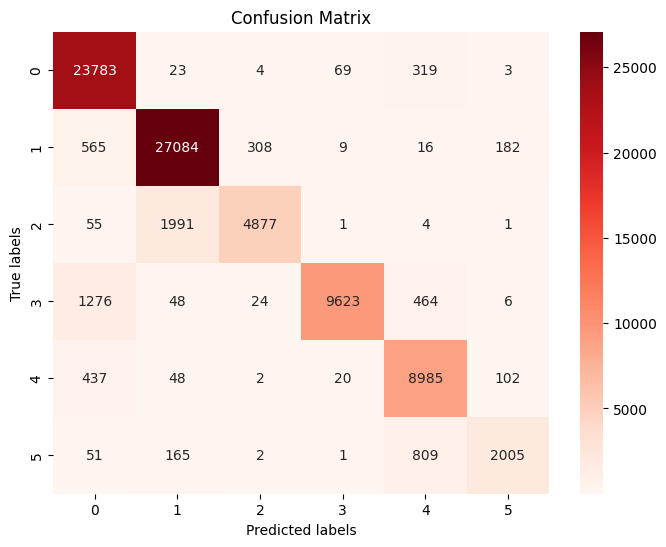

In [23]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()